In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
from collections import Counter
#help(ta)

In [2]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
0,General comment threads about individual subjects,192,Notes,Can't tell what the red/brown blob on the righ...,2015-11-09 20:50:03.309,1071522.0,Subject,33075,1396273,Sprixie,16496,Subject 1071522
1,General comment threads about individual subjects,192,Notes,"yes i agree, judging by the rough edges round ...",2015-11-10 17:11:02.277,1071522.0,Subject,33406,1813,hightower73,16496,Subject 1071522
2,"Ask us about specific manuscripts, scripts, ha...",195,Questions for the research team,There are only a few documents displaying in t...,2015-11-14 00:41:28.637,NaN,None,34596,1372521,Judy_Prouty,17263,Is this project proceeding?
3,General comment threads about individual subjects,192,Notes,Nothing on here?,2015-11-27 10:39:56.197,1167235.0,Subject,38341,478315,darktruth,19021,Subject 1167235
4,General comment threads about individual subjects,192,Notes,No text or image.,2015-11-27 10:42:46.044,1169357.0,Subject,38342,478315,darktruth,19022,Subject 1169357


In [3]:
hashtags = []

for row in df.iterrows():
    match = re.findall(r'\#[a-zA-Z0-9]+', row[1][3], re.IGNORECASE)
    for m in match:
        hashtags.append(m.lower())
print(len(hashtags))

4126


In [4]:
'''Get most common hashtags'''
c = Counter(hashtags)
c.most_common(10)

[('#letter', 302),
 ('#oed', 238),
 ('#recipe', 222),
 ('#medicine', 162),
 ('#latin', 143),
 ('#womanwriter', 139),
 ('#catholic', 129),
 ('#copiedletter', 120),
 ('#v', 79),
 ('#address', 79)]

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. The function:

````python
def makegraph(searchstring, nodefreq, regexp=False, users=True, plot=True)
````

In [5]:
ta.CoreSet.frequency("#catholic", df)

Searching for: #catholic


[('VVH', 34),
 ('mutabilitie', 15),
 ('parsfan', 10),
 ('IntelVoid', 5),
 ('schub', 5),
 ('Traceydix', 4),
 ('Cuboctahedron', 3),
 ('Christoferos', 3),
 ('joolslee', 2),
 ('dhaunsperger', 2),
 ('brownfox', 2),
 ('Hannebambel', 1),
 ('kodemunkey', 1),
 ('edtechgirl', 1),
 ('spock42', 1),
 ('jules', 1),
 ('Lynzw', 1),
 ('carl801', 1),
 ('emilyewahl', 1)]

In [13]:
ta.CoreSet.frequencypercent("#catholic", df)

Searching for: #catholic
Total hashtags: 93


[('VVH', 0.37),
 ('mutabilitie', 0.16),
 ('parsfan', 0.11),
 ('IntelVoid', 0.05),
 ('schub', 0.05),
 ('Traceydix', 0.04),
 ('Cuboctahedron', 0.03),
 ('Christoferos', 0.03),
 ('joolslee', 0.02),
 ('dhaunsperger', 0.02),
 ('brownfox', 0.02),
 ('Hannebambel', 0.01),
 ('kodemunkey', 0.01),
 ('edtechgirl', 0.01),
 ('spock42', 0.01),
 ('jules', 0.01),
 ('Lynzw', 0.01),
 ('carl801', 0.01),
 ('emilyewahl', 0.01)]

In [14]:
ta.CoreSet.hashtagtimeseries("#catholic", df)

,User,Timestamp,Hashtag
0,VVH,2015-12-13 13:15:26.931,#catholic
1,VVH,2015-12-17 17:21:46.316,#catholic
2,joolslee,2015-12-19 00:04:58.101,#catholic
3,mutabilitie,2015-12-19 08:57:25.945,#catholic
4,Hannebambel,2015-12-22 12:10:52.127,#catholic
5,mutabilitie,2015-12-23 22:07:16.190,#catholic
6,kodemunkey,2015-12-24 14:38:41.448,#catholic
7,Traceydix,2015-12-27 15:58:42.774,#catholic
8,edtechgirl,2015-12-27 23:18:54.640,#catholic
9,dhaunsperger,2015-12-28 22:07:09.775,#catholic


Searching for: #oed


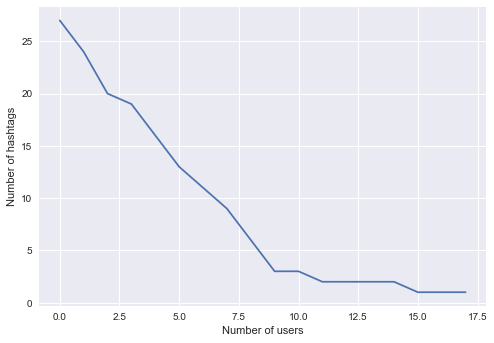

In [8]:
ta.CoreSet.histogram("#oed", df)

In [ ]:
ta.CoreSet.distplot("#oed", df)

In [ ]:
ta.CoreSet.kerneldistplot("#womanwriter", df)

Searching for: #letter


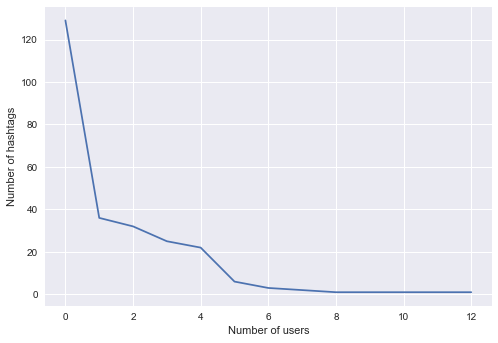

Searching for: #letter


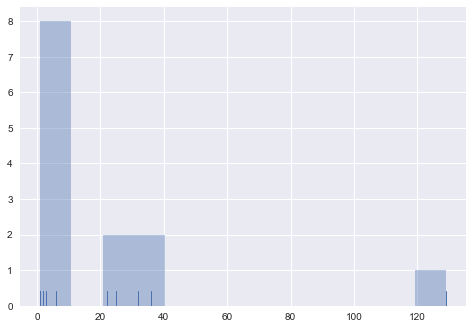

---------------
Searching for: #oed


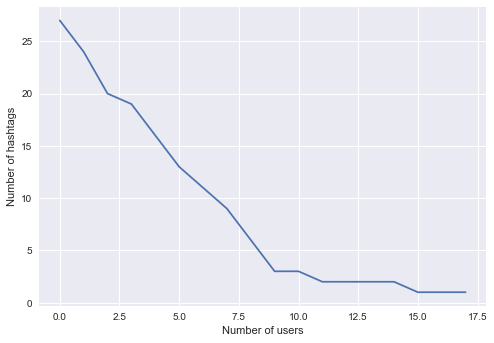

Searching for: #oed


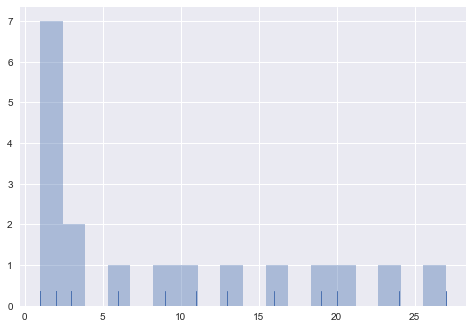

---------------
Searching for: #recipe


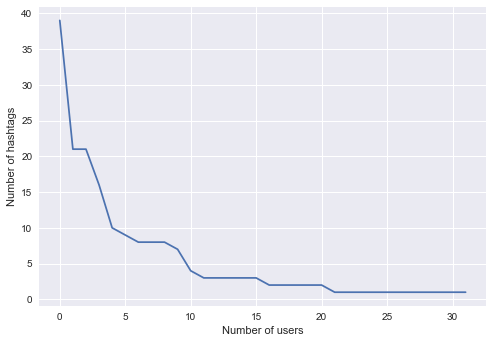

Searching for: #recipe


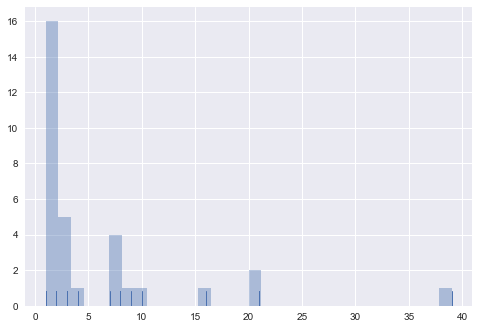

---------------
Searching for: #medicine


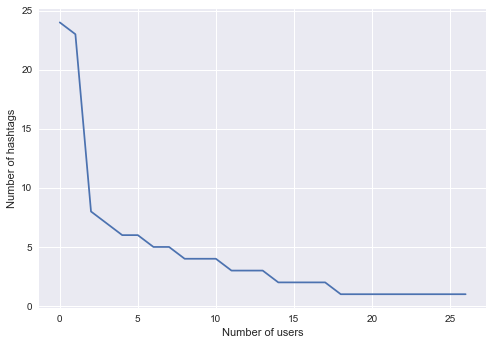

Searching for: #medicine


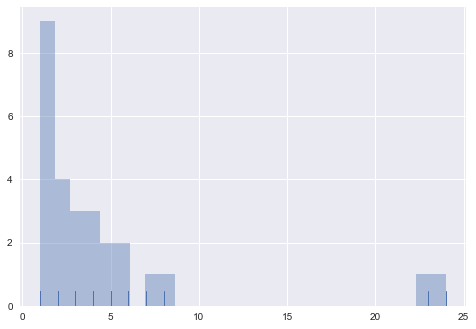

---------------
Searching for: #latin


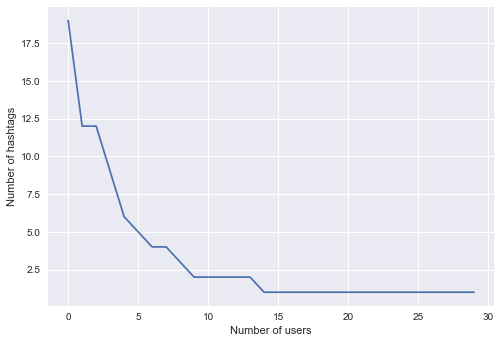

Searching for: #latin


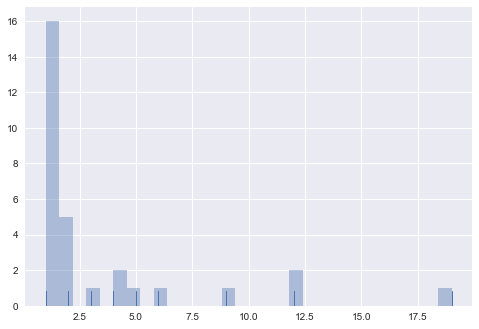

---------------
Searching for: #womanwriter


KeyboardInterrupt: 

In [5]:
'''Print graphs and stuff'''
for hashtag in c.most_common(10):
    ta.CoreSet.histogram(hashtag[0], df)
    ta.CoreSet.distplot(hashtag[0], df)
    print("---------------")

In [ ]:
ta.Network.hashtagusernetwork("#food", df, plot=True, html=False)


In [ ]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)

In [ ]:
ta.TimeSeries.regexpsearch('cathol', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

In [ ]:
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

In [ ]:
ta.Network.hashtaghashtagnetwork("#herbs", df)

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [ ]:
list(range(72))


In [ ]:
ta.Network.regexpusernetwork("packe", df)

In [ ]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

### User/hashtag network
Tracks what hashtag a specific username writes. 

In [ ]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)